In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from pathlib import Path
from scipy.stats import t

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Experiment

In [41]:
ID = ["ID"]
USER = ["SubjectID"]
IDS = ["SubjectID", "VideoID"]
TARGET = ["predefinedlabel"]
FEATURES = ["Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]

In [42]:
data_dir = Path("/home/aseliverstov/projects/brain_signals/data")
data = pd.read_csv(data_dir / "EEG_data.csv")

data["ID"] = (len(np.unique(data["VideoID"])) * data["SubjectID"] + data["VideoID"]).astype("int")
data = data[ID + IDS + FEATURES + TARGET]

data.head(3)

,ID,SubjectID,VideoID,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel
0,0,0.000,0.000,301963.000,90612.000,33735.000,23991.000,27946.000,45097.000,33228.000,8293.000,0.000
1,0,0.000,0.000,73787.000,28083.000,1439.000,2240.000,2746.000,3687.000,5293.000,2740.000,0.000
2,0,0.000,0.000,758353.000,383745.000,201999.000,62107.000,36293.000,130536.000,57243.000,25354.000,0.000


In [43]:

def plot_signal_with_ci(
    data,
    signal="Theta",
    confidence=0.75,
    use_latex=False,
    figsize=(15, 8),
    yscale='log'
):
    mpl.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times", "DejaVu Serif", "Computer Modern Roman"],
        "text.usetex": use_latex,
        "axes.labelsize": 16,
        "axes.titlesize": 17,
        "legend.fontsize": 14
    })

    plt.figure(figsize=figsize)

    video_ids = sorted(data["VideoID"].unique())

    for video_id in video_ids:
        subject_signals = []

        for k in data["SubjectID"].unique():
            cur_df = data[(data["SubjectID"] == k) & (data["VideoID"] == video_id)]
            if cur_df.empty:
                continue

            cur_target = cur_df[TARGET].iloc[0, 0].astype('int')
            signal_values = cur_df[signal].values
            subject_signals.append(signal_values)

        if not subject_signals:
            continue

        min_len = min(len(s) for s in subject_signals)
        aligned_signals = np.array([s[:min_len] for s in subject_signals])

        mean_signal = aligned_signals.mean(axis=0)
        std_signal = aligned_signals.std(axis=0, ddof=1)
        n_subjects = aligned_signals.shape[0]

        t_score = t.ppf((1 + confidence) / 2, df=n_subjects - 1)
        margin_error = t_score * std_signal / np.sqrt(n_subjects)

        lower = mean_signal - margin_error
        upper = mean_signal + margin_error

        ts = np.arange(min_len)
        plt.fill_between(ts, lower, upper, alpha=0.2, color='red' if cur_target else "blue")

    plt.yscale(yscale)
    plt.xlabel("Timestep")
    plt.ylabel("Feature Value")
    plt.title(f"{signal} signal - Mean with {int(confidence * 100)}% CI")
    plt.tight_layout()
    plt.show()


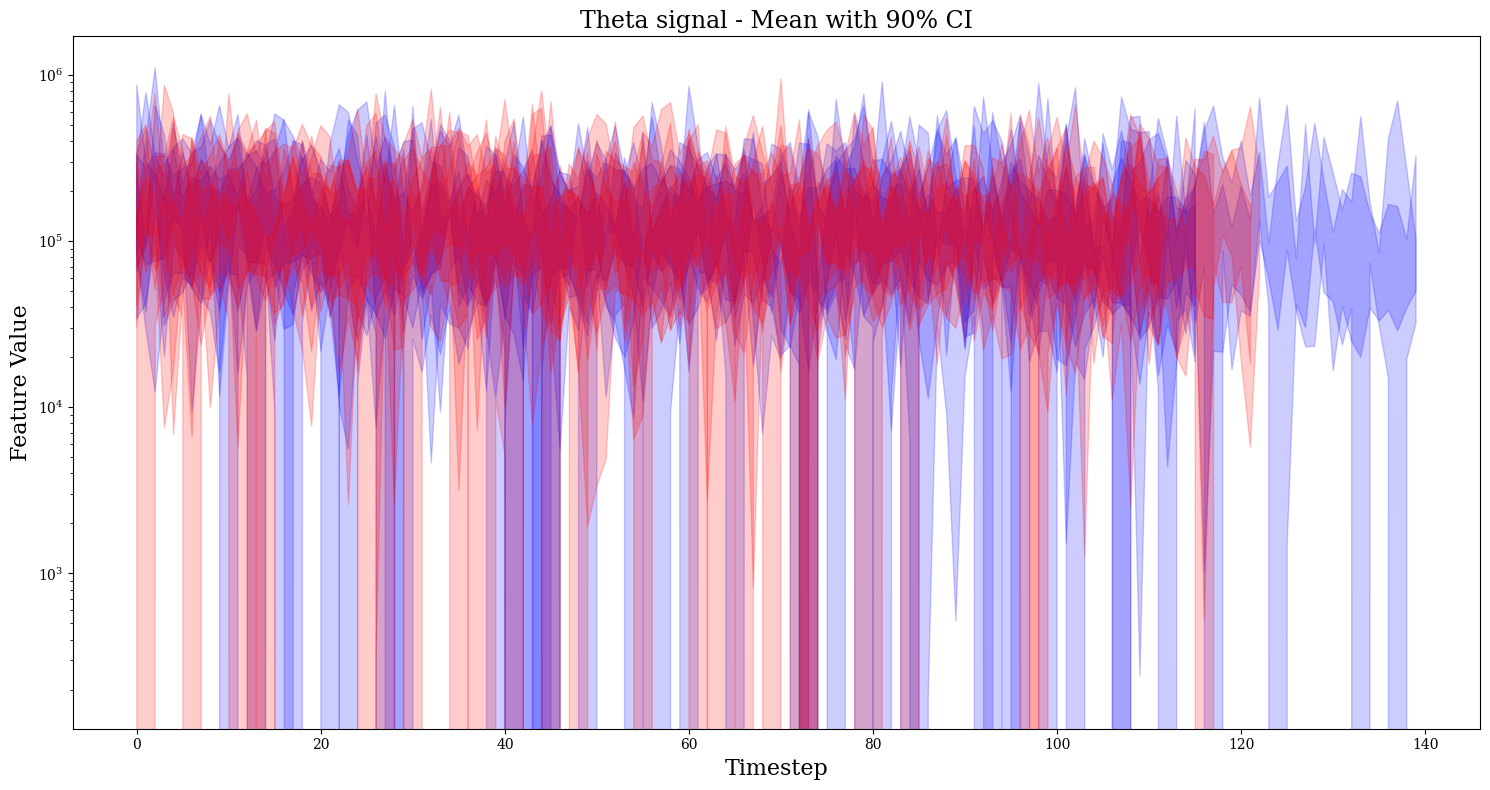

In [44]:
plot_signal_with_ci(data, signal="Theta", confidence=0.9, use_latex=False)

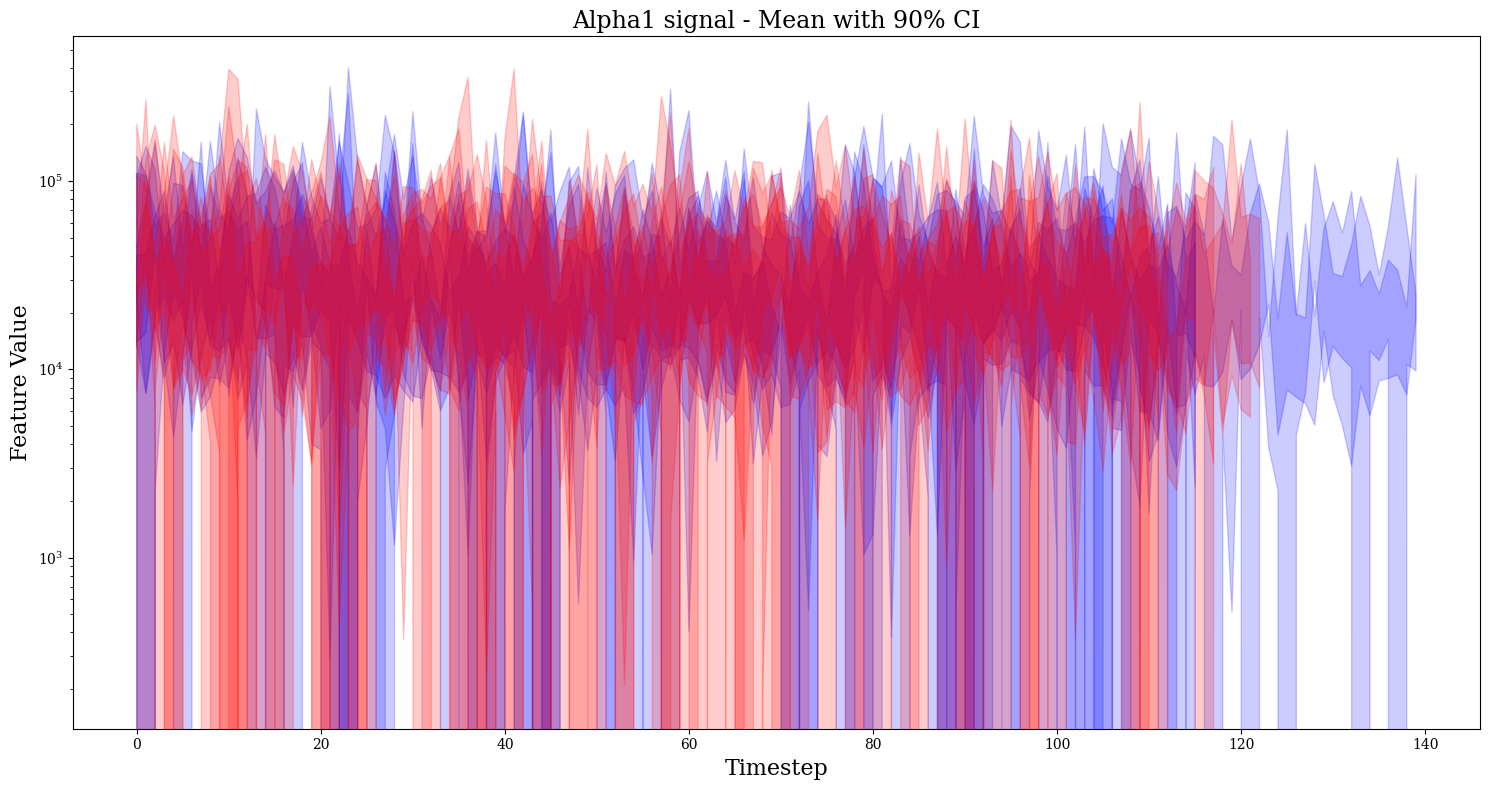

In [45]:
plot_signal_with_ci(data, signal="Alpha1", confidence=0.9, use_latex=False)

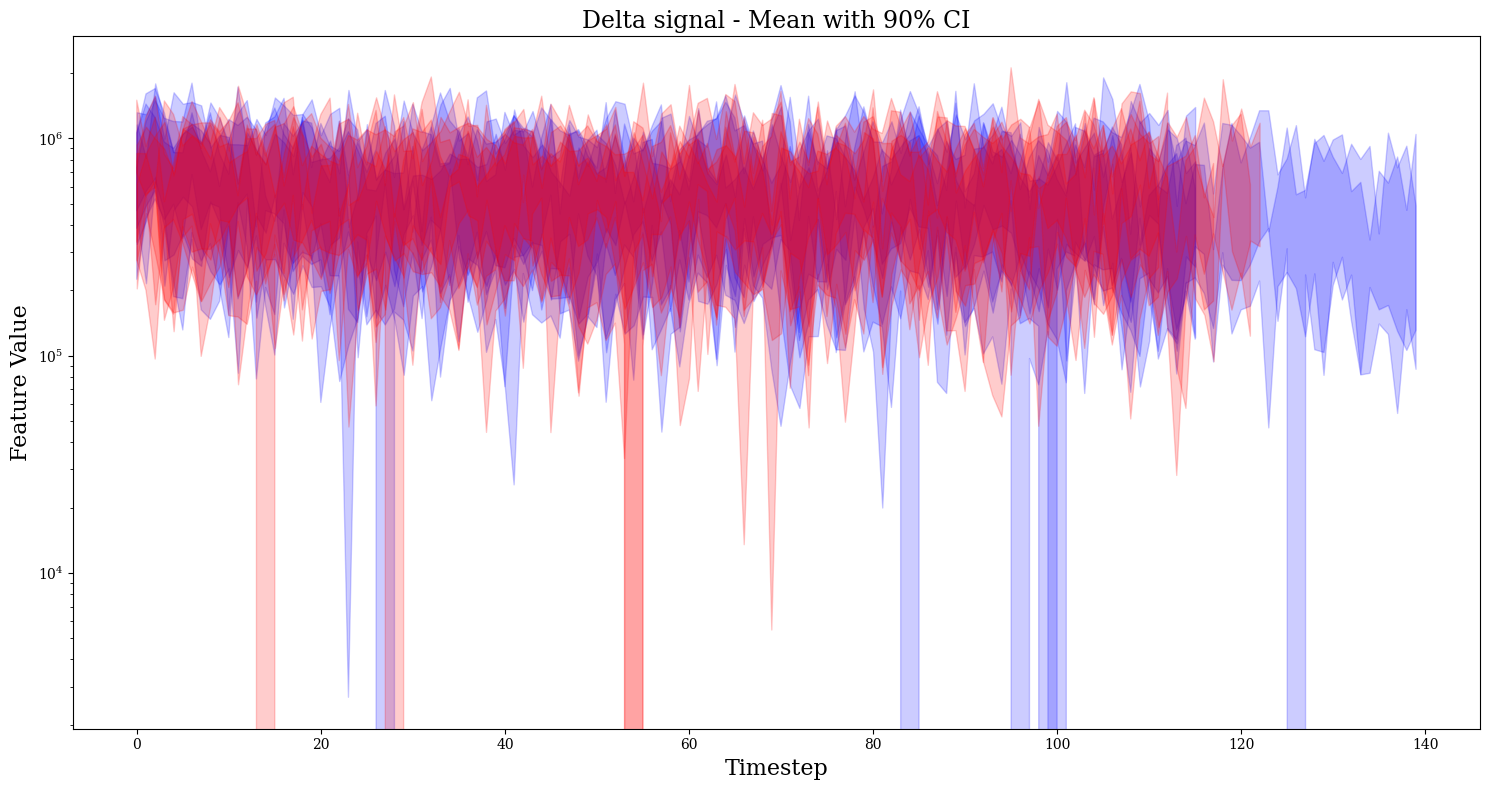

In [46]:
plot_signal_with_ci(data, signal="Delta", confidence=0.9, use_latex=False)